Optimising capacity allocation is defined here as the task of balancing passenger satisfaction using demand with business goals of minimising costs by using as little buses as possible. 

Demand, for this section, is defined as the total number of people boarding a bus for any given route, at any given hour.

Optimising capacity allocation is done by minimising the number of buses used while still meeting demand at each bus stop along each route. Rather than directly allocating the number of buses required, we determine how many journeys one bus can take in an hour on any given route. If a bus can take more than one trip per hour, this reduces the number of buses needed to be allocated.

In [ ]:
import numpy as np
import pandas as pd
import requests
import openrouteservice as ors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


Getting time taken for one journey of each bus route

In [249]:
API_KEY = '5b3ce3597851110001cf62484364c6151eb540e3949acae6888d47ef'
client = ors.Client(key=API_KEY)

bus_stops = pd.read_csv('bus_stop_coords.csv', header=None)
bus_stops.rename(columns={0:"Bus Stop", 1:"x", 2:"y"}, inplace=True)

In [250]:
A2_bus = ['KR Bus Terminal', 'IT', 'Opp YIH', 'Museum', 'UHC', 'Opp University Hall', 'S17', 'Opp KR MRT', 
          'PGP Foyer', 'TCOMS', 'Opp HSSML', 'Opp NUSS', 'Ventus', 'KR Bus Terminal']
D1_bus = ['COM3', 'Opp HSSML', 'Opp NUSS', 'Ventus', 'IT', 'Opp YIH', 'Museum', 'UTown', 'YIH', 'CLB', 'LT13', 'AS5', 'BIZ2', 'COM3']
D2_bus = ['COM3', 'Opp TCOMS', 'PGP Terminal', 'KR MRT', 'LT27', 'University Hall', 'Opp UHC', 'Museum', 
          'UTown', 'UHC', 'Opp University Hall', 'S17', 'Opp KR MRT', 'PGP Foyer', 'TCOMS', 'COM3']
A1_bus = ['KR Bus Terminal', 'LT13', 'AS5', 'BIZ2', 'Opp TCOMS', 'PGP Terminal', 'KR MRT', 'LT27', 
          'University Hall', 'Opp UHC', 'YIH', 'CLB', 'KR Bus Terminal']


def get_route_timing(route, df):
    route_df = pd.DataFrame({'Bus Stop': route})
    route_df = route_df.merge(df, on='Bus Stop', how='left')
    dir_coord = [(route_df['y'].iloc[i], route_df['x'].iloc[i]) for i in range(len(route_df))]
    bus_route = client.directions(coordinates=dir_coord, profile='driving-car', format='geojson')

    segment_durations = [segment['duration'] for segment in bus_route['features'][0]['properties']['segments']]
    total_duration_seconds = sum(segment_durations)  
    total_duration_minutes = total_duration_seconds / 60 
    return total_duration_minutes

A1_time = get_route_timing(A1_bus, bus_stops)
A2_time = get_route_timing(A2_bus, bus_stops)
D1_time = get_route_timing(D1_bus, bus_stops)
D2_time = get_route_timing(D2_bus, bus_stops)


In [251]:
def get_route_time_mapbox(url):
    response = requests.get(url)
    route = response.json()
    if 'routes' in route and len(route['routes']) > 0:
        segment_durations = []
        for leg in route['routes'][0]['legs']:
            segment_durations.append(leg['duration'])
        total_duration_seconds = sum(segment_durations)
        total_duration_minutes = total_duration_seconds / 60
        return total_duration_minutes
    else:
        return None

btc_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/103.817832%2C1.319848%3B103.818893%2C1.320928%3B103.815903%2C1.32268%3B103.784429%2C1.294841%3B103.780988%2C1.297413%3B103.778766%2C1.297204%3B103.775656%2C1.29881%3B103.774434%2C1.303535%3B103.772749%2C1.301005%3B103.769636%2C1.301896%3B103.769058%2C1.302245%3B103.773469%2C1.301136%3B103.774308%2C1.298863%3B103.772194%2C1.296321%3B103.770581%2C1.294841%3B103.771738%2C1.293506%3B103.775121%2C1.29325%3B103.780403%2C1.291822%3B103.816278%2C1.323278%3B103.81827%2C1.319337?alternatives=false&geometries=geojson&language=en&overview=full&steps=true&access_token=pk.eyJ1IjoiZ3VvaG9uZ3lpMTExIiwiYSI6ImNtMng0OHc4cTAwenMybG9iczg4cjBoNjcifQ.tc6o1kU_mTemKQhbVy5mNA'
E_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/103.774437%2C1.303529%3B103.772744%2C1.301%3B103.769629%2C1.301897%3B103.769053%2C1.302199%3B103.770144%2C1.300623%3B103.769865%2C1.297757%3B103.77271%2C1.297189%3B103.774132%2C1.298847%3B103.774415%2C1.303511?alternatives=false&geometries=geojson&language=en&overview=full&steps=true&access_token=pk.eyJ1IjoiZ3VvaG9uZ3lpMTExIiwiYSI6ImNtMng0OHc4cTAwenMybG9iczg4cjBoNjcifQ.tc6o1kU_mTemKQhbVy5mNA'
K_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/103.78039%2C1.2918%3B103.784424%2C1.294834%3B103.780996%2C1.297405%3B103.778771%2C1.297191%3B103.775658%2C1.298817%3B103.774306%2C1.298857%3B103.772199%2C1.296316%3B103.769637%2C1.297888%3B103.769957%2C1.300739%3B103.769629%2C1.301901%3B103.769015%2C1.302229%3B103.773468%2C1.301142%3B103.77606%2C1.298901%3B103.778076%2C1.297504%3B103.780704%2C1.297515%3B103.784574%2C1.294956%3B103.781073%2C1.290993?alternatives=false&geometries=geojson&language=en&overview=full&steps=true&access_token=pk.eyJ1IjoiZ3VvaG9uZ3lpMTExIiwiYSI6ImNtMng0OHc4cTAwenMybG9iczg4cjBoNjcifQ.tc6o1kU_mTemKQhbVy5mNA'

btc_time = get_route_time_mapbox(btc_url)
E_time = get_route_time_mapbox(E_url)
K_time = get_route_time_mapbox(K_url)

Defining a model that allocates buses optimally. The model returns the minimum number of buses needed in the fleet, and a dataframe that has the minimum number of buses to allocate to each route per hour.

In [252]:
def convert_hour(min_data):
    min_data['hour'] = min_data['time_start']// 60
    hourly_demand = min_data.groupby(['ISB_Service', 'day_of_the_week', 'hour'])['demand'].sum().reset_index(name='demand')
    return hourly_demand

In [253]:
route_times = {
    0: A1_time,
    1: A2_time, 
    2: btc_time,
    3: D1_time,
    4: D2_time,
    5: E_time,
    6: K_time   
}

bus_capacity = 88

def optimize_buses_needed(data, route_times, bus_capacity):
    # Calculate maximum demand by route and hour
    max_demand_per_route_hour = data.groupby(['ISB_Service', 'day_of_the_week', 'hour'])['demand'].max().reset_index(name='max_demand')
    
    # Function to calculate the number of buses needed
    def calculate_buses_needed(row):
        route_id = row['ISB_Service']
        peak_demand = row['max_demand']
        turnaround_time = route_times.get(route_id)
        trips_per_hour = np.floor(60 / turnaround_time)  # Calculate number of full trips per hour
        buses_needed = np.ceil(np.ceil(peak_demand / bus_capacity) / trips_per_hour)
        return buses_needed

    # Apply the calculation to determine buses needed per route, day, and hour
    max_demand_per_route_hour['buses_needed'] = max_demand_per_route_hour.apply(calculate_buses_needed, axis=1)
    
    # Calculate the minimum buses needed per hour by summing across all routes
    buses_per_hour = max_demand_per_route_hour.groupby(['day_of_the_week', 'hour'])['buses_needed'].sum().reset_index(name='min_buses_needed')
    # Calculate the number of buses to allocate each route per day
    buses_needed_per_route_day = max_demand_per_route_hour.groupby(['ISB_Service', 'day_of_the_week'])['buses_needed'].max().reset_index()
    print(buses_needed_per_route_day)
    return buses_per_hour


In [254]:
# Get the maximum sum of min_buses_needed across all day-hour groups
def get_max_num(data):
    return data['min_buses_needed'].max()

Data preparation to test the model

In [255]:
df = pd.read_csv('synthetic_data.csv')
data = df[['ISB_Service', 'bus_stop_board', 'bus_stop_alight', 'day_of_the_week', 'time_start', 'travel_duration', 'frequency', 'punctuality', 'cleanliness', 'safety', 'coverage', 'crowdedness']]


In [ ]:
# Convert time_start to datetime format and then to minutes from midnight
data['time_start'] = pd.to_datetime(data['time_start'], format='%H:%M:%S')
data['time_start'] = data['time_start'].dt.hour * 60 + data['time_start'].dt.minute

# Encode categorical variables using Label Encoding
label_encoders = {}
mappings = {}

for col in ['ISB_Service', 'bus_stop_board', 'bus_stop_alight', 'day_of_the_week','travel_duration']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  

/var/folders/3l/pyqr7thn7wx8vj942lhs85qw0000gn/T/ipykernel_3676/3172468676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_start'] = pd.to_datetime(data['time_start'], format='%H:%M:%S')
/var/folders/3l/pyqr7thn7wx8vj942lhs85qw0000gn/T/ipykernel_3676/3172468676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_start'] = data['time_start'].dt.hour * 60 + data['time_start'].dt.minute
/var/folders/3l/pyqr7thn7wx8vj942lhs85qw0000gn/T/ipykernel_3676/3172468676.py:11: SettingWithCopyWa

Convert time_start into an hourly format for easier grouping.

In [257]:
check2 = data.groupby(['ISB_Service', 'day_of_the_week', 'time_start', 'bus_stop_board']).size().reset_index(name='demand')
hourly_demand = convert_hour(check2)

In [258]:

max_demand_per_route_hour = hourly_demand.groupby(['ISB_Service', 'day_of_the_week', 'hour'])['demand'].max().reset_index(name='max_demand')

# Example of calling the function on any dataframe with the required columns
optimized_data = optimize_buses_needed(hourly_demand, route_times, bus_capacity)


    ISB_Service  day_of_the_week  buses_needed
0             0                0           3.0
1             0                1           1.0
2             0                2           1.0
3             0                3           1.0
4             0                4           1.0
5             0                5           2.0
6             0                6           2.0
7             1                0           1.0
8             1                1           1.0
9             1                2           1.0
10            1                3           1.0
11            1                4           1.0
12            1                5           1.0
13            1                6           1.0
14            2                0           2.0
15            2                1           1.0
16            2                2           1.0
17            2                3           1.0
18            2                4           1.0
19            2                5           1.0
20           

In [ ]:
max_hourly_bus_sum = get_max_num(optimized_data)
print("Minimum number of buses the fleet should have:", max_hourly_bus_sum)


Maximum total buses needed in any hour across all routes and days: 21.0


Assumptions:
- By catering to the bus stop with highest demand, demand at other bus stps will be met due to the cycical nature of people getting on and off. 
- Peak hours will be reflected in demand. We validate this assumption by running a visualisation of demand over time for each day.

Based on domain knowledge, peak hours can be defined as 08:30 - 10:00, 10:30 - 14:00, 17:30 - 19:00. Here, we check that peak hours are captured by changes in demand. 

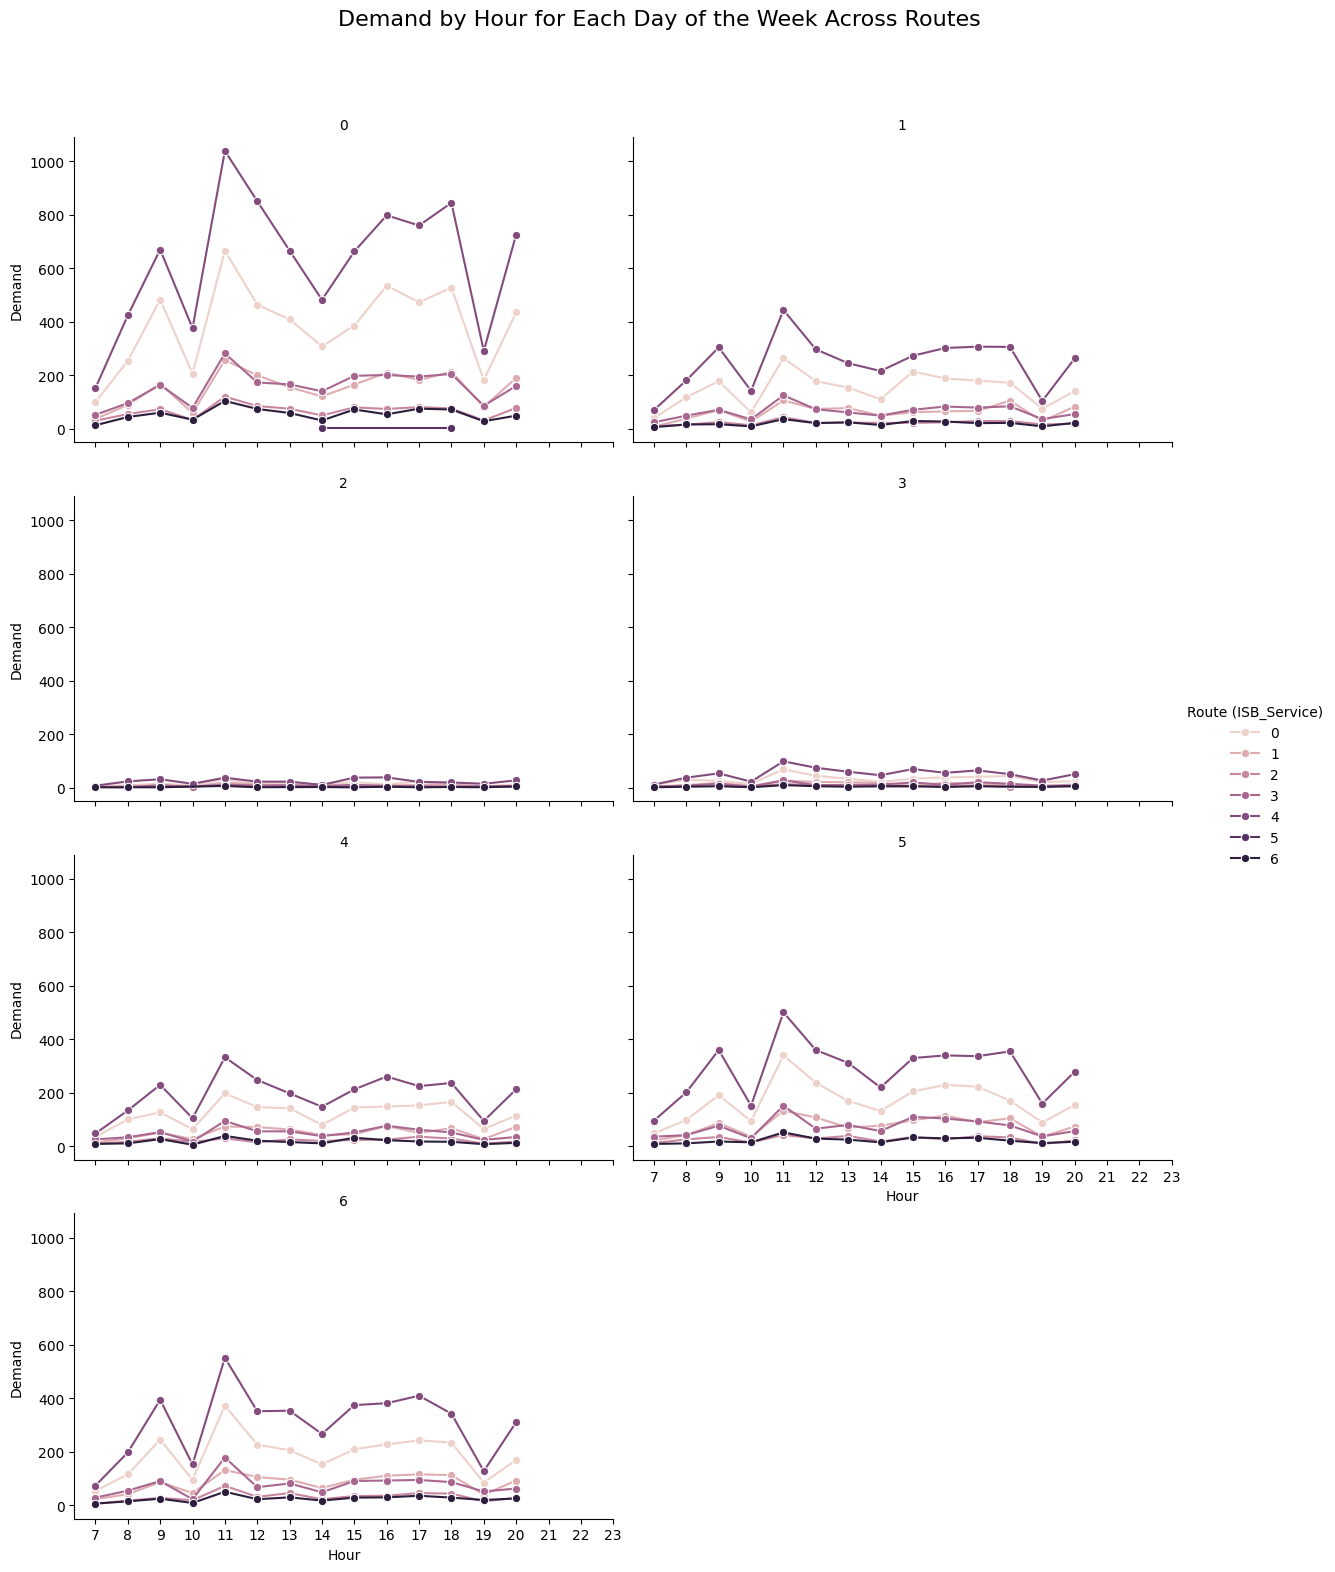

In [260]:
# Visualise demand of all routes over time for each day
# Set up the FacetGrid with each subplot representing a different day of the week
g = sns.FacetGrid(
    hourly_demand, 
    col='day_of_the_week', 
    col_wrap=2, 
    height=4, 
    aspect=1.5
)

g.map(
    sns.lineplot, 
    'hour', 'demand', 'ISB_Service', 
    marker='o'
)

for ax in g.axes.flat:
    ax.set_xticks(range(7, 24)) 
    ax.set_xticklabels(range(7, 24))

g.set_titles("{col_name}")
g.set_axis_labels("Hour", "Demand")
g.add_legend(title="Route (ISB_Service)")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Demand by Hour for Each Day of the Week Across Routes', fontsize=16)
plt.show()


We can see from the graph that demand increases drastically during peak hours. Hence, we can conclude that peak hours are captured in demand and will be considered when allocating capacity.